In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
column_names = ['family', 'product-type', 'steel', 'carbon', 'hardness',
       'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing',
       'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt',
       'me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro',
       'corr', 'color', 'lustre', 'jurofm', 's', 'p', 'shape', 'thick',
       'width', 'len', 'oil', 'bore', 'packing', 'classes']

# Loading and Processing Training Data

In [3]:
f1 = pd.read_csv("anneal.data", header = None )

In [4]:
f1.columns = column_names

In [5]:
f1.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,8,0,?,S,?,0,?,...,?,?,COIL,0.700,610.0,0,?,0,?,3
1,?,C,R,0,0,?,S,2,0,?,...,?,?,COIL,3.200,610.0,0,?,0,?,3
2,?,C,R,0,0,?,S,2,0,?,...,?,?,SHEET,0.700,1300.0,762,?,0,?,3
3,?,C,A,0,60,T,?,?,0,?,...,?,?,COIL,2.801,385.1,0,?,0,?,3
4,?,C,A,0,60,T,?,?,0,?,...,?,?,SHEET,0.801,255.0,269,?,0,?,3


In [6]:
for col in f1.columns:
     f1[col] = f1[col].replace(to_replace = '?', value = np.NaN)

In [7]:
f1.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3


In [8]:
f1.isnull().sum()

family             687
product-type         0
steel               70
carbon               0
hardness             0
temper_rolling     675
condition          271
formability        283
strength             0
non-ageing         703
surface-finish     790
surface-quality    217
enamelability      785
bc                 797
bf                 680
bt                 736
me                 609
bl                 662
m                  798
chrom              775
phos               791
cbond              730
marvi              798
exptl              796
ferro              772
corr               798
color              793
lustre             753
jurofm             798
s                  798
p                  798
shape                0
thick                0
width                0
len                  0
oil                740
bore                 0
packing            789
classes              0
dtype: int64

In [9]:
f1 = f1.drop(columns = [ "family", "strength", "temper_rolling",'non-ageing','surface-finish', 'enamelability', 'bc', 'bf', 'bt',
       'me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro','corr', 'color', 'lustre', 'jurofm', 's', 'p', 'oil', 'packing'])

In [10]:
f1.head()

,product-type,steel,carbon,hardness,condition,formability,surface-quality,shape,thick,width,len,bore,classes
0,C,A,8,0,S,NaN,G,COIL,0.700,610.0,0,0,3
1,C,R,0,0,S,2,E,COIL,3.200,610.0,0,0,3
2,C,R,0,0,S,2,E,SHEET,0.700,1300.0,762,0,3
3,C,A,0,60,NaN,NaN,G,COIL,2.801,385.1,0,0,3
4,C,A,0,60,NaN,NaN,G,SHEET,0.801,255.0,269,0,3


In [12]:
f1.count

<bound method DataFrame.count of     product-type steel  carbon  hardness condition formability  \
0              C     A       8         0         S         NaN   
1              C     R       0         0         S           2   
2              C     R       0         0         S           2   
3              C     A       0        60       NaN         NaN   
4              C     A       0        60       NaN         NaN   
..           ...   ...     ...       ...       ...         ...   
793            C     A       0        50       NaN         NaN   
794            C   NaN       0         0         S           1   
795            C     A       0         0         S           2   
796            C     A       0         0         S           2   
797            C     R       0         0         S           2   

    surface-quality  shape  thick   width   len  bore classes  
0                 G   COIL  0.700   610.0     0     0       3  
1                 E   COIL  3.200   610.0     

In [13]:
f1.describe()

,carbon,hardness,thick,width,len,bore
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,4.000000,1525.000000,4880.000000,600.000000


In [14]:
#Starting EDA
import matplotlib.pyplot as plt 
import seaborn as sns

C:\Users\burhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    608
2     88
5     60
U     34
1      8
Name: classes, dtype: int64


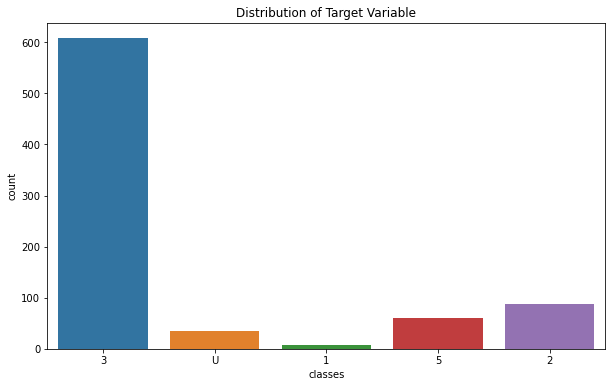

In [15]:
#Distribution of Target

plt.figure(figsize=(10,6))
sns.countplot('classes', data=f1).set_title('Distribution of Target Variable')
print(f1.classes.value_counts())

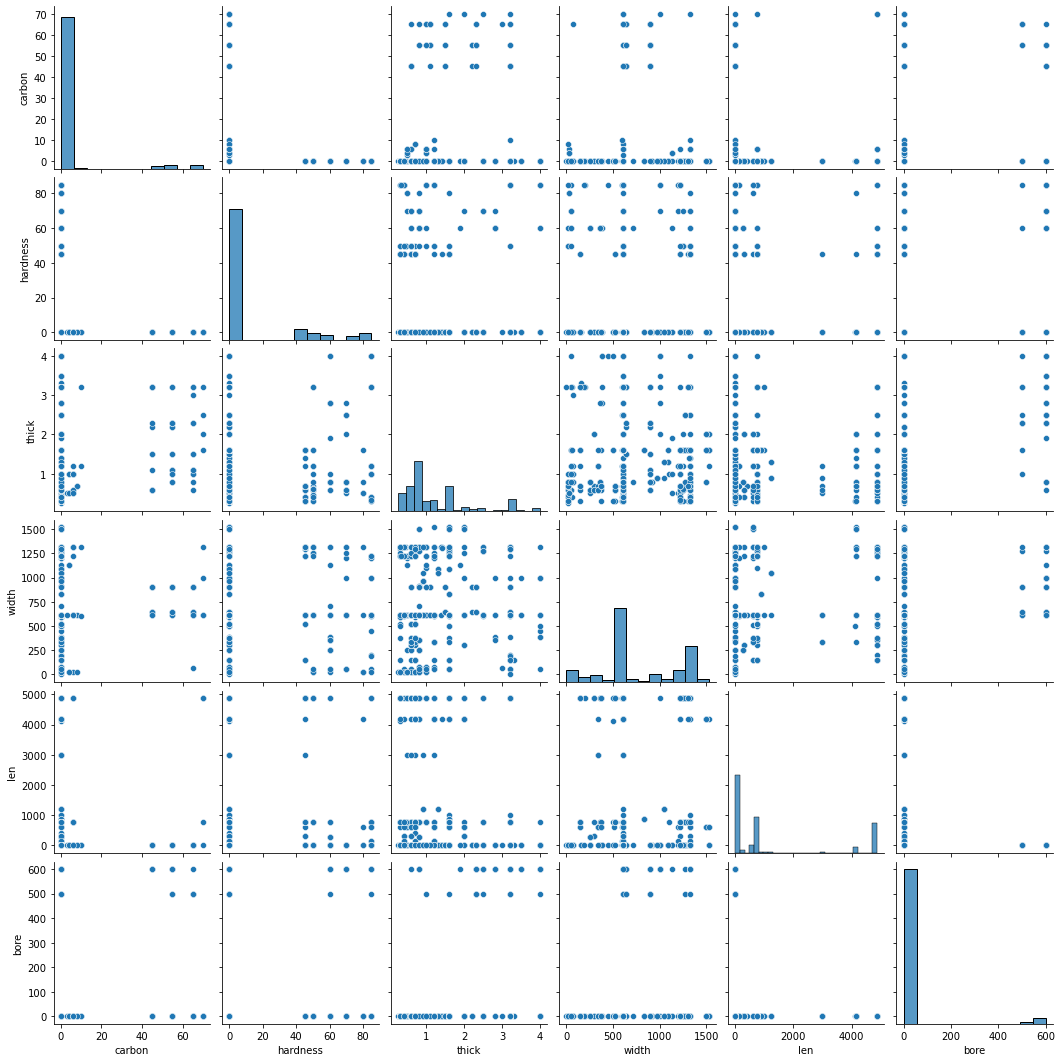

In [24]:
sns.pairplot(f1, kind = "scatter")

In [25]:
f1.dtypes

product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability         object
surface-quality     object
shape               object
thick              float64
width              float64
len                  int64
bore                 int64
classes             object
dtype: object

In [26]:
f1.isnull().sum()

product-type       0
steel              0
carbon             0
hardness           0
condition          0
formability        0
surface-quality    0
shape              0
thick              0
width              0
len                0
bore               0
classes            0
dtype: int64

In [27]:
#Fill the null values
f1 = f1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(f1)

    product-type steel  carbon  hardness condition formability  \
0              C     A       8         0         S           2   
1              C     R       0         0         S           2   
2              C     R       0         0         S           2   
3              C     A       0        60         S           2   
4              C     A       0        60         S           2   
..           ...   ...     ...       ...       ...         ...   
793            C     A       0        50         S           2   
794            C     A       0         0         S           1   
795            C     A       0         0         S           2   
796            C     A       0         0         S           2   
797            C     R       0         0         S           2   

    surface-quality  shape  thick   width   len  bore classes  
0                 G   COIL  0.700   610.0     0     0       3  
1                 E   COIL  3.200   610.0     0     0       3  
2              

In [28]:
f1.isnull().sum()

product-type       0
steel              0
carbon             0
hardness           0
condition          0
formability        0
surface-quality    0
shape              0
thick              0
width              0
len                0
bore               0
classes            0
dtype: int64

In [29]:
f1.describe()

,carbon,hardness,thick,width,len,bore
count,798.000000,798.000000,798.000000,798.000000,798.000000,798.000000
mean,3.547619,11.748120,1.181847,781.744361,1273.037594,28.195489
std,13.592644,24.621001,0.861608,404.722346,1886.768139,124.811534
min,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.601000,609.900000,0.000000,0.000000
50%,0.000000,0.000000,0.800000,610.000000,611.000000,0.000000
75%,0.000000,0.000000,1.600000,1250.000000,762.000000,0.000000
max,70.000000,85.000000,4.000000,1525.000000,4880.000000,600.000000


In [30]:
f1.dtypes

product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability         object
surface-quality     object
shape               object
thick              float64
width              float64
len                  int64
bore                 int64
classes             object
dtype: object

In [31]:
f1 = pd.get_dummies(f1, columns=["product-type", "steel","condition", "formability", "surface-quality", "shape"], prefix=["product-type", "steel","condition", "formability", "surface-quality", "shape"])

In [32]:
f1["classes"] = f1["classes"].map({"U" :0, "1" :1 ,"2":2, "3": 3, "4":4, "5":5 }).astype(int) #mapping numbers
f1.head()

,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
0,8,0,0.700,610.0,0,0,3,1,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,3.200,610.0,0,0,3,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0.700,1300.0,762,0,3,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,60,2.801,385.1,0,0,3,1,1,0,...,0,1,0,0,0,0,0,1,1,0
4,0,60,0.801,255.0,269,0,3,1,1,0,...,0,1,0,0,0,0,0,1,0,1


In [33]:
f1.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
793    False
794    False
795     True
796    False
797    False
Length: 798, dtype: bool

In [34]:
f1.duplicated().sum()

145

In [35]:
f1 = f1.drop_duplicates()

In [36]:
f1.duplicated().sum()

0

## Outliers Handling

In [37]:
#checking the outlier 
q1, q3 = np.percentile(f1, [25,75])
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
outliers = ((f1 < lower_limit) | (f1 > upper_limit))

In [38]:
outliers.sum()

carbon                58
hardness             139
thick                 68
width                652
len                  338
bore                  35
classes              543
product-type_C         0
steel_A                0
steel_K                0
steel_M                0
steel_R                0
steel_S                0
steel_V                0
steel_W                0
condition_A            0
condition_S            0
formability_1          0
formability_2          0
formability_3          0
formability_5          0
surface-quality_D      0
surface-quality_E      0
surface-quality_F      0
surface-quality_G      0
shape_COIL             0
shape_SHEET            0
dtype: int64

In [39]:
print(f1.columns)
f11 = f1[["thick", "width", "len"]]
f11

Index(['carbon', 'hardness', 'thick', 'width', 'len', 'bore', 'classes',
       'product-type_C', 'steel_A', 'steel_K', 'steel_M', 'steel_R', 'steel_S',
       'steel_V', 'steel_W', 'condition_A', 'condition_S', 'formability_1',
       'formability_2', 'formability_3', 'formability_5', 'surface-quality_D',
       'surface-quality_E', 'surface-quality_F', 'surface-quality_G',
       'shape_COIL', 'shape_SHEET'],
      dtype='object')


,thick,width,len
0,0.700,610.0,0
1,3.200,610.0,0
2,0.700,1300.0,762
3,2.801,385.1,0
4,0.801,255.0,269
...,...,...,...
792,0.900,966.0,0
793,1.001,50.0,0
794,0.699,1300.0,4880
796,3.200,610.0,4880


In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ["thick", "width", "len"]
scaler.fit(f11)
scaled = scaler.fit_transform(f11)
scaled

array([[0.12      , 0.4       , 0.        ],
       [0.78666667, 0.4       , 0.        ],
       [0.12      , 0.85245902, 0.15614754],
       ...,
       [0.11973333, 0.85245902, 1.        ],
       [0.78666667, 0.4       , 1.        ],
       [0.35973333, 0.98360656, 0.8545082 ]])

In [41]:
f11 = pd.DataFrame(scaled, columns=col)
print(f11)
f1[["thick", "width", "len"]] = f11[["thick", "width", "len"]]
f1.head()

        thick     width       len
0    0.120000  0.400000  0.000000
1    0.786667  0.400000  0.000000
2    0.120000  0.852459  0.156148
3    0.680267  0.252525  0.000000
4    0.146933  0.167213  0.055123
..        ...       ...       ...
648  0.173333  0.633443  0.000000
649  0.200267  0.032787  0.000000
650  0.119733  0.852459  1.000000
651  0.786667  0.400000  1.000000
652  0.359733  0.983607  0.854508

[653 rows x 3 columns]


,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
0,8,0,0.120000,0.400000,0.000000,0,3,1,1,0,...,0,1,0,0,0,0,0,1,1,0
1,0,0,0.786667,0.400000,0.000000,0,3,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0,0.120000,0.852459,0.156148,0,3,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,0,60,0.680267,0.252525,0.000000,0,3,1,1,0,...,0,1,0,0,0,0,0,1,1,0
4,0,60,0.146933,0.167213,0.055123,0,3,1,1,0,...,0,1,0,0,0,0,0,1,0,1


In [42]:
q1, q3 = np.percentile(f1, [25,75])
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
outliers = ((f1 < lower_limit) | (f1 > upper_limit))

In [43]:
outliers.sum()

carbon               0
hardness             0
thick                0
width                0
len                  0
bore                 0
classes              0
product-type_C       0
steel_A              0
steel_K              0
steel_M              0
steel_R              0
steel_S              0
steel_V              0
steel_W              0
condition_A          0
condition_S          0
formability_1        0
formability_2        0
formability_3        0
formability_5        0
surface-quality_D    0
surface-quality_E    0
surface-quality_F    0
surface-quality_G    0
shape_COIL           0
shape_SHEET          0
dtype: int64

In [44]:
f1.isnull().sum()

carbon                 0
hardness               0
thick                101
width                101
len                  101
bore                   0
classes                0
product-type_C         0
steel_A                0
steel_K                0
steel_M                0
steel_R                0
steel_S                0
steel_V                0
steel_W                0
condition_A            0
condition_S            0
formability_1          0
formability_2          0
formability_3          0
formability_5          0
surface-quality_D      0
surface-quality_E      0
surface-quality_F      0
surface-quality_G      0
shape_COIL             0
shape_SHEET            0
dtype: int64

In [45]:
f1 = f1.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(f1)

     carbon  hardness     thick     width       len  bore  classes  \
0         8         0  0.120000  0.400000  0.000000     0        3   
1         0         0  0.786667  0.400000  0.000000     0        3   
2         0         0  0.120000  0.852459  0.156148     0        3   
3         0        60  0.680267  0.252525  0.000000     0        3   
4         0        60  0.146933  0.167213  0.055123     0        3   
..      ...       ...       ...       ...       ...   ...      ...   
792       0         0  0.093333  0.400000  0.000000     0        3   
793       0        50  0.093333  0.400000  0.000000     0        3   
794       0         0  0.093333  0.400000  0.000000     0        3   
796       0         0  0.093333  0.400000  0.000000     0        3   
797       0         0  0.093333  0.400000  0.000000     0        2   

     product-type_C  steel_A  steel_K  ...  formability_1  formability_2  \
0                 1        1        0  ...              0              1   
1      

,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
carbon,1.000000,-0.132161,0.014281,-0.031289,-0.028012,0.254879,0.030817,NaN,-0.311938,0.908203,...,-0.063914,0.149489,-0.121039,-0.031280,-0.067590,0.206654,-0.066686,-0.154721,0.228085,-0.228085
hardness,-0.132161,1.000000,0.011248,-0.010887,-0.003469,0.146448,-0.429203,NaN,0.407565,-0.120650,...,-0.120650,0.282192,-0.228487,-0.059047,0.319814,-0.399788,-0.125883,0.333099,0.118853,-0.118853
thick,0.014281,0.011248,1.000000,0.090361,0.004452,0.059842,-0.044927,NaN,-0.011707,0.000214,...,0.017949,0.047014,-0.050188,-0.044992,0.017161,-0.036218,0.000493,0.030207,-0.002159,0.002159
width,-0.031289,-0.010887,0.090361,1.000000,0.159907,-0.047048,-0.012284,NaN,0.057204,-0.027337,...,-0.024334,-0.029764,0.040380,0.025952,-0.004618,-0.095354,0.085652,0.061483,-0.000109,0.000109
len,-0.028012,-0.003469,0.004452,0.159907,1.000000,-0.048527,0.031719,NaN,0.031413,-0.007214,...,0.012939,-0.011905,-0.001626,0.023677,0.068882,-0.038952,0.036809,-0.013895,-0.113485,0.113485


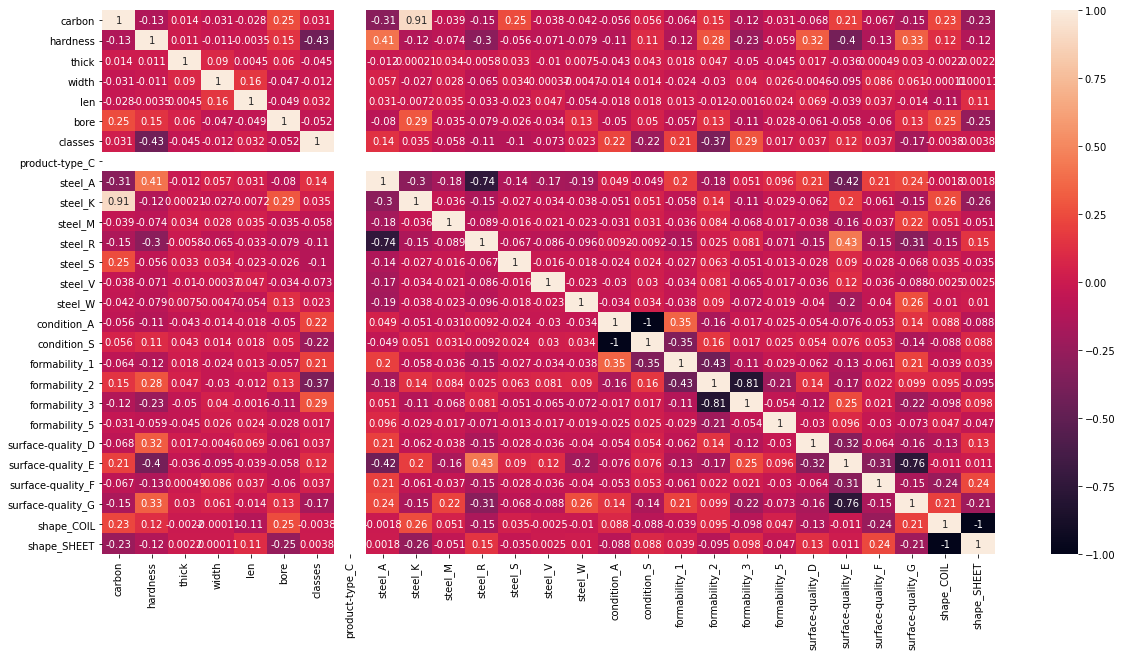

In [46]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= f1.corr()
sns.heatmap(c,annot=True)
c.head()

In [47]:
f1.isnull().sum()

carbon               0
hardness             0
thick                0
width                0
len                  0
bore                 0
classes              0
product-type_C       0
steel_A              0
steel_K              0
steel_M              0
steel_R              0
steel_S              0
steel_V              0
steel_W              0
condition_A          0
condition_S          0
formability_1        0
formability_2        0
formability_3        0
formability_5        0
surface-quality_D    0
surface-quality_E    0
surface-quality_F    0
surface-quality_G    0
shape_COIL           0
shape_SHEET          0
dtype: int64

## Preprocessing

In [48]:
#pre-processing 
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()

In [50]:
f1.columns

Index(['carbon', 'hardness', 'thick', 'width', 'len', 'bore', 'classes',
       'product-type_C', 'steel_A', 'steel_K', 'steel_M', 'steel_R', 'steel_S',
       'steel_V', 'steel_W', 'condition_A', 'condition_S', 'formability_1',
       'formability_2', 'formability_3', 'formability_5', 'surface-quality_D',
       'surface-quality_E', 'surface-quality_F', 'surface-quality_G',
       'shape_COIL', 'shape_SHEET'],
      dtype='object')

In [51]:
scaler.fit(f1.drop("classes", axis=1))

StandardScaler()

In [52]:
scaled_features = scaler.transform(f1.drop('classes', axis=1))

In [53]:
X_train = scaled_features
Y_train = f1["classes"]

In [54]:
len(X_train), len(Y_train)

(653, 653)

# Loading and Processing Testing Data

In [55]:
#getting another data for test
f2 = pd.read_csv("anneal.test", header = None)
f2.columns = column_names
f2.head()

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,classes
0,?,C,A,0,45,?,S,?,0,?,...,?,?,COIL,1.600,610.0,0,?,0,?,3
1,?,C,A,0,0,?,S,3,0,N,...,?,?,COIL,0.699,609.9,0,?,0,?,3
2,ZS,C,A,0,85,T,?,?,0,?,...,?,?,SHEET,0.400,610.0,762,?,0,?,U
3,ZS,C,A,0,50,T,?,?,0,?,...,?,?,COIL,0.400,610.0,0,?,0,?,3
4,?,C,A,0,0,?,S,2,0,?,...,?,?,COIL,0.699,1320.0,0,?,0,?,3


In [56]:
for col in f2.columns:
     f2[col] = f2[col].replace(to_replace = '?', value = np.NaN)

In [57]:
f2.isnull().sum()

family              85
product-type         0
steel               16
carbon               0
hardness             0
temper_rolling      86
condition           32
formability         35
strength             0
non-ageing          90
surface-finish      99
surface-quality     27
enamelability       97
bc                 100
bf                  89
bt                  88
me                  78
bl                  87
m                  100
chrom               97
phos               100
cbond               94
marvi              100
exptl              100
ferro               96
corr               100
color               99
lustre              94
jurofm             100
s                  100
p                  100
shape                0
thick                0
width                0
len                  0
oil                 94
bore                 0
packing            100
classes              0
dtype: int64

In [58]:
f2 = f2.drop(columns = [ "family", "strength", "temper_rolling",'non-ageing','surface-finish', 'enamelability', 'bc', 'bf', 'bt',
       'me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro','corr', 'color', 'lustre', 'jurofm', 's', 'p', 'oil', 'packing'])

In [59]:
f2.head()

,product-type,steel,carbon,hardness,condition,formability,surface-quality,shape,thick,width,len,bore,classes
0,C,A,0,45,S,NaN,D,COIL,1.600,610.0,0,0,3
1,C,A,0,0,S,3,E,COIL,0.699,609.9,0,0,3
2,C,A,0,85,NaN,NaN,E,SHEET,0.400,610.0,762,0,U
3,C,A,0,50,NaN,NaN,E,COIL,0.400,610.0,0,0,3
4,C,A,0,0,S,2,E,COIL,0.699,1320.0,0,0,3


In [60]:
f2.isnull().sum()

product-type        0
steel              16
carbon              0
hardness            0
condition          32
formability        35
surface-quality    27
shape               0
thick               0
width               0
len                 0
bore                0
classes             0
dtype: int64

In [61]:
#Starting EDA
import matplotlib.pyplot as plt 
import matplotlib.pyplot as plt #visualisation
import seaborn as sns

C:\Users\burhan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


3    76
2    11
5     7
U     6
Name: classes, dtype: int64


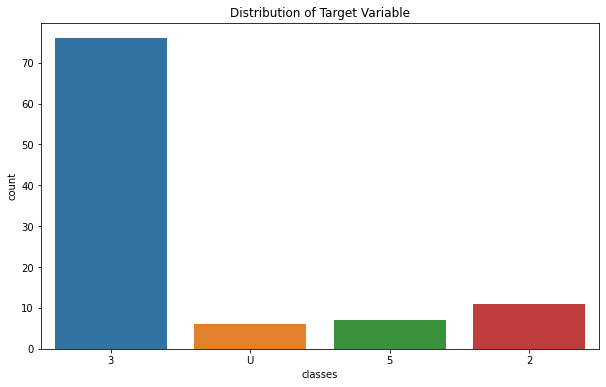

In [62]:
#Distribution of Target

plt.figure(figsize=(10,6))
sns.countplot('classes', data=f2).set_title('Distribution of Target Variable')
print(f2.classes.value_counts())


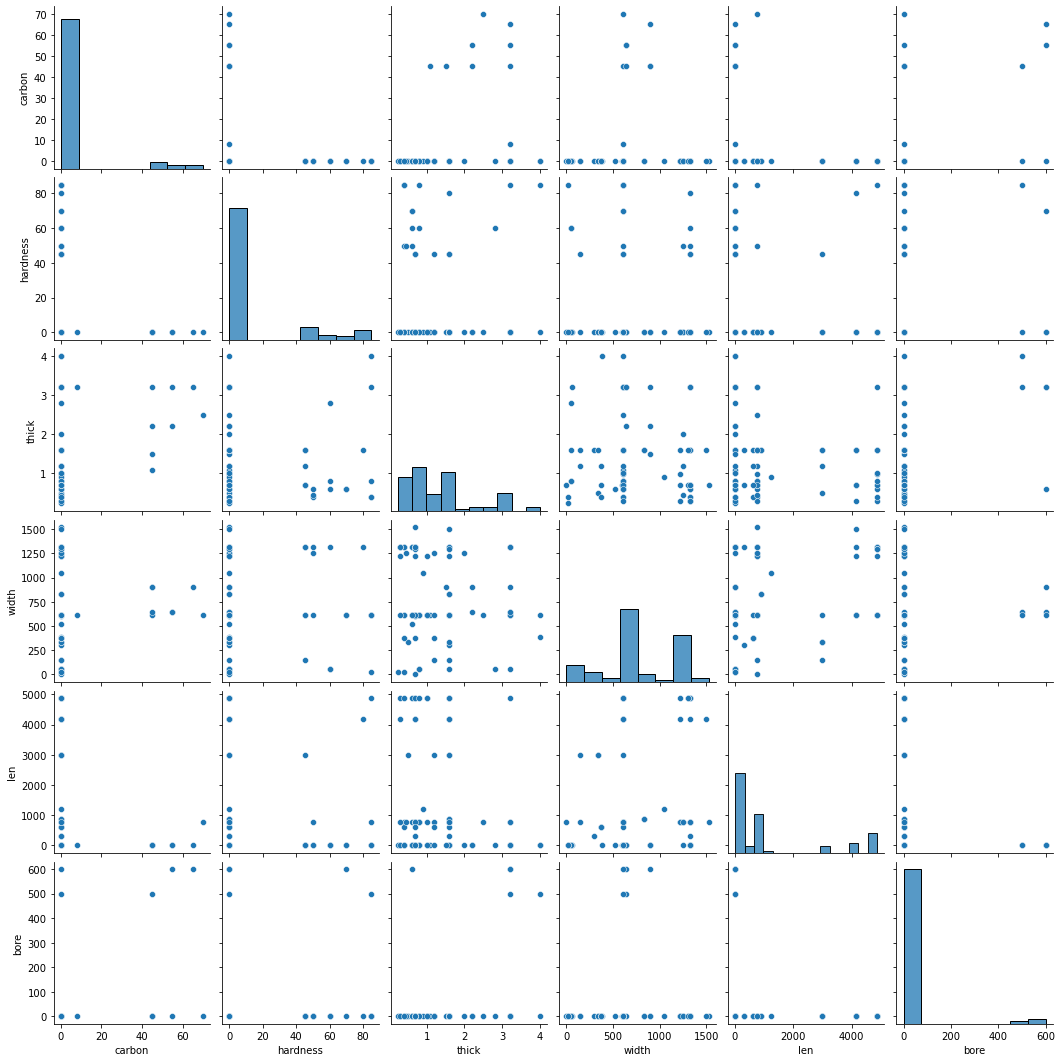

In [66]:
sns.pairplot(f2, kind = "scatter")

In [67]:
f2.dtypes

product-type        object
steel               object
carbon               int64
hardness             int64
condition           object
formability         object
surface-quality     object
shape               object
thick              float64
width              float64
len                  int64
bore                 int64
classes             object
dtype: object

In [68]:
f2 = f2.apply(lambda x: x.fillna(x.value_counts().index[0]))
print(f2)

   product-type steel  carbon  hardness condition formability surface-quality  \
0             C     A       0        45         S           2               D   
1             C     A       0         0         S           3               E   
2             C     A       0        85         S           2               E   
3             C     A       0        50         S           2               E   
4             C     A       0         0         S           2               E   
..          ...   ...     ...       ...       ...         ...             ...   
95            C     R       0         0         S           3               E   
96            C     R       0         0         S           3               E   
97            C     V       0         0         S           2               E   
98            C     A       0        85         S           2               G   
99            C     A       0        85         S           2               G   

    shape  thick   width  l

In [69]:
f2.describe()

,carbon,hardness,thick,width,len,bore
count,100.000000,100.00000,100.000000,100.0000,100.000000,100.000000
mean,4.330000,12.00000,1.331830,771.9470,1183.750000,28.000000
std,14.724442,25.88826,0.938301,412.2423,1750.817352,123.157122
min,0.000000,0.00000,0.240000,0.0000,0.000000,0.000000
25%,0.000000,0.00000,0.699000,609.9000,0.000000,0.000000
50%,0.000000,0.00000,0.999500,610.0000,612.000000,0.000000
75%,0.000000,0.00000,1.600000,1250.0000,791.500000,0.000000
max,70.000000,85.00000,4.000000,1525.0000,4880.000000,600.000000


In [70]:
f2.isnull().sum()


product-type       0
steel              0
carbon             0
hardness           0
condition          0
formability        0
surface-quality    0
shape              0
thick              0
width              0
len                0
bore               0
classes            0
dtype: int64

In [71]:
f2 = pd.get_dummies(f2, columns=["product-type", "steel","condition", "formability", "surface-quality", "shape"], prefix=["product-type", "steel","condition", "formability", "surface-quality", "shape"])

In [72]:
f2["classes"] = f2["classes"].map({"U" :0, "1" :1 ,"2":2, "3": 3, "4":4, "5":5 }).astype(int) #mapping numbers
f2.head()

,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
0,0,45,1.600,610.0,0,0,3,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0.699,609.9,0,0,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,85,0.400,610.0,762,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,50,0.400,610.0,0,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0.699,1320.0,0,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [73]:
f2.duplicated().sum()

0

In [74]:
q1, q3 = np.percentile(f2, [25,75])
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
outliers = ((f2 < lower_limit) | (f2 > upper_limit))

In [75]:
outliers.sum()

carbon                9
hardness             19
thick                14
width                99
len                  53
bore                  5
classes              83
product-type_C        0
steel_A               0
steel_K               0
steel_M               0
steel_R               0
steel_S               0
steel_V               0
steel_W               0
condition_A           0
condition_S           0
formability_1         0
formability_2         0
formability_3         0
formability_5         0
surface-quality_D     0
surface-quality_E     0
surface-quality_F     0
surface-quality_G     0
shape_COIL            0
shape_SHEET           0
dtype: int64

In [76]:
print(f2.columns)
f12 = f2[["thick", "width", "len"]]
f12


Index(['carbon', 'hardness', 'thick', 'width', 'len', 'bore', 'classes',
       'product-type_C', 'steel_A', 'steel_K', 'steel_M', 'steel_R', 'steel_S',
       'steel_V', 'steel_W', 'condition_A', 'condition_S', 'formability_1',
       'formability_2', 'formability_3', 'formability_5', 'surface-quality_D',
       'surface-quality_E', 'surface-quality_F', 'surface-quality_G',
       'shape_COIL', 'shape_SHEET'],
      dtype='object')


,thick,width,len
0,1.600,610.0,0
1,0.699,609.9,0
2,0.400,610.0,762
3,0.400,610.0,0
4,0.699,1320.0,0
...,...,...,...
95,1.599,610.0,762
96,1.601,830.0,880
97,1.599,150.0,762
98,0.400,20.0,0


In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
col = ["thick", "width", "len"]
scaler.fit(f12)
scaled = scaler.fit_transform(f12)

In [78]:
f12 = pd.DataFrame(scaled, columns=col)
print(f12)
f2[["thick", "width", "len"]] = f12[["thick", "width", "len"]]
f2

       thick     width       len
0   0.361702  0.400000  0.000000
1   0.122074  0.399934  0.000000
2   0.042553  0.400000  0.156148
3   0.042553  0.400000  0.000000
4   0.122074  0.865574  0.000000
..       ...       ...       ...
95  0.361436  0.400000  0.156148
96  0.361968  0.544262  0.180328
97  0.361436  0.098361  0.156148
98  0.042553  0.013115  0.000000
99  1.000000  0.400000  0.000000

[100 rows x 3 columns]


,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
0,0,45,0.361702,0.400000,0.000000,0,3,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0.122074,0.399934,0.000000,0,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,85,0.042553,0.400000,0.156148,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,50,0.042553,0.400000,0.000000,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0.122074,0.865574,0.000000,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0.361436,0.400000,0.156148,0,2,1,0,0,...,0,0,1,0,0,1,0,0,0,1
96,0,0,0.361968,0.544262,0.180328,0,2,1,0,0,...,0,0,1,0,0,1,0,0,0,1
97,0,0,0.361436,0.098361,0.156148,0,2,1,0,0,...,0,1,0,0,0,1,0,0,0,1
98,0,85,0.042553,0.013115,0.000000,0,0,1,1,0,...,0,1,0,0,0,0,0,1,1,0


In [79]:
q1, q3 = np.percentile(f2, [25,75])
iqr = q3 - q1
lower_limit = q1 - (1.5*iqr)
upper_limit = q3 + (1.5*iqr)
outliers = ((f2 < lower_limit) | (f2 > upper_limit))

In [80]:
outliers.sum()

carbon                9
hardness             19
thick                 0
width                 0
len                   0
bore                  5
classes              83
product-type_C        0
steel_A               0
steel_K               0
steel_M               0
steel_R               0
steel_S               0
steel_V               0
steel_W               0
condition_A           0
condition_S           0
formability_1         0
formability_2         0
formability_3         0
formability_5         0
surface-quality_D     0
surface-quality_E     0
surface-quality_F     0
surface-quality_G     0
shape_COIL            0
shape_SHEET           0
dtype: int64

In [81]:
f1.isnull().sum()

carbon               0
hardness             0
thick                0
width                0
len                  0
bore                 0
classes              0
product-type_C       0
steel_A              0
steel_K              0
steel_M              0
steel_R              0
steel_S              0
steel_V              0
steel_W              0
condition_A          0
condition_S          0
formability_1        0
formability_2        0
formability_3        0
formability_5        0
surface-quality_D    0
surface-quality_E    0
surface-quality_F    0
surface-quality_G    0
shape_COIL           0
shape_SHEET          0
dtype: int64

In [82]:
f2.head()

,carbon,hardness,thick,width,len,bore,classes,product-type_C,steel_A,steel_K,...,formability_1,formability_2,formability_3,formability_5,surface-quality_D,surface-quality_E,surface-quality_F,surface-quality_G,shape_COIL,shape_SHEET
0,0,45,0.361702,0.400000,0.000000,0,3,1,1,0,...,0,1,0,0,1,0,0,0,1,0
1,0,0,0.122074,0.399934,0.000000,0,3,1,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,85,0.042553,0.400000,0.156148,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1
3,0,50,0.042553,0.400000,0.000000,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0.122074,0.865574,0.000000,0,3,1,1,0,...,0,1,0,0,0,1,0,0,1,0


In [83]:
#pre-processing 
from sklearn.preprocessing import StandardScaler

In [84]:
scaler = StandardScaler()

In [85]:
scaler.fit(f2.drop('classes', axis=1))

StandardScaler()

In [86]:
scaled_features = scaler.transform(f2.drop('classes', axis=1))

In [87]:
X_test = scaled_features
Y_test = f2["classes"]

In [88]:
len(X_test), len(Y_test)

(100, 100)

# Model Training and Testing

## KNN

In [89]:
from sklearn.neighbors import KNeighborsClassifier

### Finding Optimal K

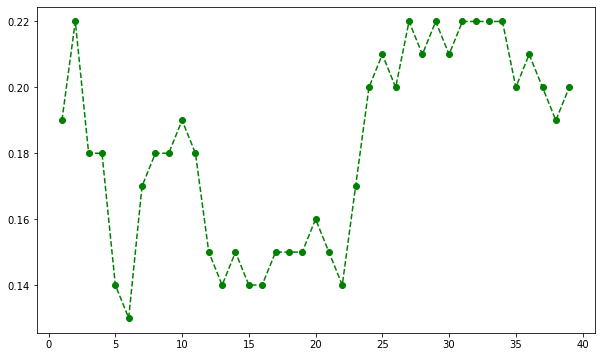

In [90]:
error_rates =[]

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, Y_train)
    pred = knn.predict(X_test)
    error_rates.append( np.mean(pred!=Y_test) )

opt_k = error_rates.index(min(error_rates)) + 1

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rates, color='green', linestyle='dashed',marker='o')

In [91]:
knn = KNeighborsClassifier(n_neighbors = opt_k)

In [92]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=6)

In [93]:
pred = knn.predict(X_test)

In [94]:
from sklearn.metrics import classification_report, confusion_matrix

[[ 3  0  3  0]
 [ 0  8  3  0]
 [ 0  5 70  1]
 [ 0  0  1  6]]


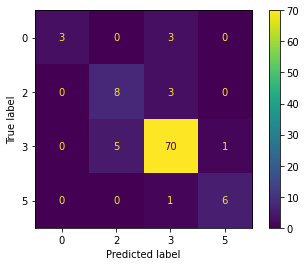

In [115]:
from sklearn.metrics import ConfusionMatrixDisplay
print( confusion_matrix(Y_test, pred))
plot_confusion_matrix(knn, X_test, Y_test)  
plt.show()

In [116]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           2       0.62      0.73      0.67        11
           3       0.91      0.92      0.92        76
           5       0.86      0.86      0.86         7

    accuracy                           0.87       100
   macro avg       0.85      0.75      0.78       100
weighted avg       0.88      0.87      0.87       100



## SVM Classifier

In [117]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [118]:
cls = SVC(C=50).fit(X_train, Y_train)
#C is penalty to model

In [119]:
# train and test accuracy
accuracy_train = accuracy_score(Y_train, cls.predict(X_train))
accuracy_test = accuracy_score(Y_test, cls.predict(X_test))

print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 87.90%
Test Accuracy: 91.00%


In [120]:
print(classification_report(Y_test, cls.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           2       0.70      0.64      0.67        11
           3       0.95      0.93      0.94        76
           5       0.78      1.00      0.88         7

    accuracy                           0.91       100
   macro avg       0.86      0.89      0.87       100
weighted avg       0.91      0.91      0.91       100



## Decision Tree

In [121]:
#we will use decision tree model for better accuracy 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

print("Decision Tree Accuracy:{:.2f}%".format(model.score(X_test, Y_test) * 100))

Decision Tree Accuracy:79.00%


In [122]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           2       0.25      0.27      0.26        11
           3       0.87      0.86      0.86        76
           5       0.71      0.71      0.71         7

    accuracy                           0.79       100
   macro avg       0.71      0.71      0.71       100
weighted avg       0.80      0.79      0.79       100

